# 随机森林分类

In [9]:
import numpy as np
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from read_5500_data import get_5500_data

% matplotlib inline

随机森林是一个非常简单, 效果又不错的分类器. 可以作为机器学习的基准. 如果随机森林的分类器仍然不好用, 推荐使用深度神经网络了. 

评估一个模型的优劣, 要看ROC曲线的形态和AUC分数

* ROC曲线越靠近左上越好, 
* AUC就是ROC曲线下面积, 越大越好, 最大值=1

## 读取数据

In [2]:
data_path="data_sim" # "data_sim"是模拟数据目录
class_file="class_sim.csv" # "class_sim.cs"是模拟分类说明文件
X,y=get_5500_data(data_path,class_file, 
                 start_time=0,duration=5, # 按照时间截取数据, 设置截取的初始时间和时间长度
                 redundancy=5, # 截取后数据长度可能不一致, 统一补全到duration*5+redundancy的长度
                 padding_with="last" # 以最后一个有效数据补全
                 )

## 分拆数据

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 建立并训练模型
此处使用的是随机森林分类器的默认设置. 如果运算过程太长, 或者评估不理想, 也可以考虑调整其中的参数

In [5]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## 评估模型

In [7]:
y_pred=clf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)
print("AUC=",auc(fpr_rf, tpr_rf))

AUC= 1.0


## ROC曲线

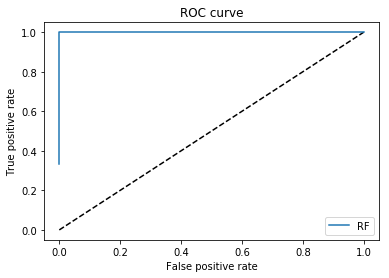

In [8]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()